In [209]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

# Veri Seti

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# CSV dosyasını okuma
df = pd.read_csv("\\Users\\hafize.ogut\\Downloads\\Data_Science_Algorthim\\Dataset\\Hitters.csv")

# Eksik değerleri içeren satırları kaldırma
df = df.dropna()

# Kategorik değişkenleri dummy değişkenlere dönüştürme
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Hedef değişken (maaş) olarak Salary sütununu seçme
y = df["Salary"]

# Özellikler veri çerçevesinden hedef değişkeni ve kategorik değişkenleri çıkartma
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)

# Dummy değişkenleri orijinal özellikler veri çerçevesine ekleme
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1).astype('float64')

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [19]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [21]:
dms 

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False
...,...,...,...,...,...,...
317,False,True,True,False,False,True
318,True,False,True,False,True,False
319,True,False,False,True,True,False
320,True,False,True,False,True,False


In [29]:
df.shape

(263, 20)

In [31]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [33]:
ridge_model

Ridge(alpha=0.1)

In [37]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [39]:
ridge_model.intercept_

-4.578626905722331

In [43]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [57]:
lambdalar  = 10 ** np.linspace(10,-2,100)*0.5

In [59]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [61]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [65]:
katsayilar

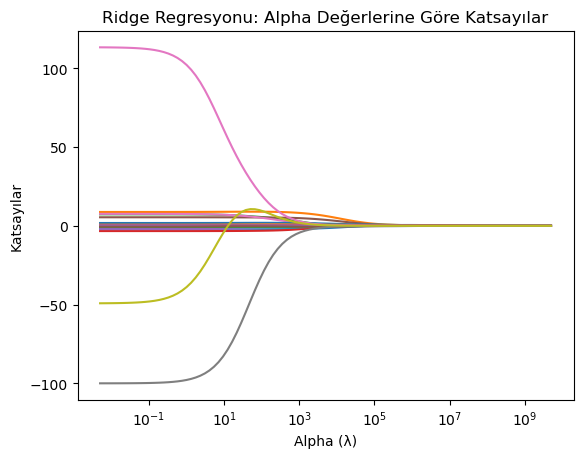

In [69]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")
ax.set_xlabel('Alpha (λ)')  # X ekseni etiketini ayarlama
ax.set_ylabel('Katsayılar') # Y ekseni etiketini ayarlama
ax.set_title('Ridge Regresyonu: Alpha Değerlerine Göre Katsayılar')
plt.show()

In [75]:
ridge_model = Ridge().fit(X_train,y_train)

In [77]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328,91,12,51,43,33,2,342,94,12,51,44,33,145,59,8,True,False,True
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,229,453,15,True,False,True
286,593,152,23,69,75,53,6,2765,686,133,369,384,321,315,10,6,False,True,False
102,233,49,2,41,23,18,8,1350,336,7,166,122,106,102,132,10,False,False,False
153,341,95,6,48,42,20,10,2964,808,81,379,428,221,158,4,5,True,True,True


In [81]:
y_pred = ridge_model.predict(X_train)

In [83]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [85]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [87]:
#traşn hatası
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.3447069600656

In [106]:
import pandas as pd
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train, cv = 10,scoring ="neg_mean_squared_error")))

351.39315856063183

In [110]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [112]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.8082905730238

# Model Tuning

In [119]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8082905730238

In [129]:
import numpy as np
np.random.randint(0,1000,100)

array([997, 635, 287, 423, 878, 113, 572, 196,  39, 772, 430, 813,  59,
       710, 834, 145, 937, 227, 946, 613, 130, 508, 147, 321, 591, 418,
         8,  69, 910, 828,  11, 692, 980, 681, 774, 958, 147, 620, 655,
       987, 109, 199, 917, 491, 647, 220, 729, 276, 330, 603, 402, 976,
       710, 279, 340, 911, 654, 342, 764, 476,  70, 589, 650, 644, 967,
       925, 753, 163, 324, 668, 956, 985, 703, 962, 241, 929, 378, 136,
       430, 873, 374, 183, 712, 668, 975, 148, 631, 621,  36, 653, 815,
       816, 206, 733, 659, 741, 936, 547,  57,  84])

In [157]:
lambdalar1 = np.random.randint(0,1000,100)

In [159]:
lambdalar2 = 10 ** np.linspace(10,-2,100)*0.5


In [161]:
lambdalar2

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [219]:
 
ridgecv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error",cv = 10)

In [221]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [222]:
ridgecv.alpha_

1526927.7544167063

In [229]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)

In [231]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

385.86438561469333